In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Neuron:
    
    def __init__(self, size):
        self.W = [random.random() for i in range(size)]
        
    def compute(self, X):
        return sum([(w - x) ** 2 for w, x in zip(self.W, X)]) ** (1/2)
    
    def modification(self, X, n):
        self.W = [w + n * (x - w) for w, x in zip(self.W, X)]

In [3]:
class Web:
    
    def __init__(self, inp, hidden):
        self.neurons = [Neuron(inp) for i in range(hidden)]
        self.errors = [[0 for j in range(inp)] for i in range(hidden)]
        self.e = 1
    
    def getW(self):
        return [neuron.W.copy() for neuron in self.neurons]
    
    def err(self):
        res = []
        for l0, l1 in zip(self.errors, self.getW()):
            res.append(sum([(e0 - e1) ** 2 for e0, e1 in zip(l0, l1)]) / len(l0))
        self.errors = self.getW()
        if max(res) != self.e:
            self.e = max(res)
            return True
        else:      
            return False
    
    def learn(self, X, alpha):
        for x in X:
            res = []
            for neuron in self.neurons:
                res.append(neuron.compute(x))
            self.neurons[res.index(min(res))].modification(x, alpha)
        alpha *= 0.9
        
    
    def fit(self, X, n, epoch=0):
        alpha = n
        if epoch != 0:
            for i in range(epoch):
                self.learn(X, alpha)
        else:
            while(self.err()):
                self.learn(X, alpha)
            
    def predict(self, X):
        out = []
        for x in X:
            res = []
            for neuron in self.neurons:
                res.append(neuron.compute(x))
            out.append(res)
        return out
    


In [4]:
x = []
y = []
for i in range(50):
    x.append(random.random())
    y.append(random.random())
dots = np.array([x, y]).tolist()

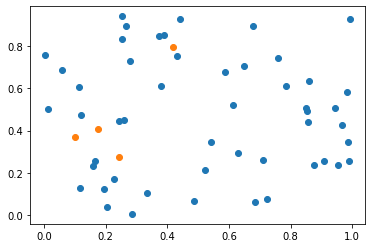

In [6]:
web = Web(2, 4)
centres = web.getW()
centres = np.array(centres).transpose().tolist()
plt.plot(dots[0], dots[1], 'o')
plt.plot(centres[0], centres[1], 'o')

In [7]:
fit_dots = np.array(dots).transpose().tolist()
web.fit(fit_dots, 1)

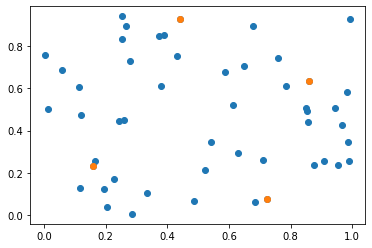

In [8]:
centres = web.getW()
centres = np.array(centres).transpose().tolist()
plt.plot(dots[0], dots[1], 'o')
plt.plot(centres[0], centres[1], 'o')